<a href="https://colab.research.google.com/github/mostafacii25/K-means/blob/main/kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implémentation Numpy de l'algorithme k-means



> 

  - L'algorithme k-means est parmi les algorithmes d'apprentissage non supervisé, les plus simples et les plus utilisés dans les applications du monde réel

   - c'est un algorithme  qui permet de regrouper des données en groupes distincts, appelés clusters, en utilisant des calculs de distance pour assigner chaque point de données à un groupe spécifique.


>  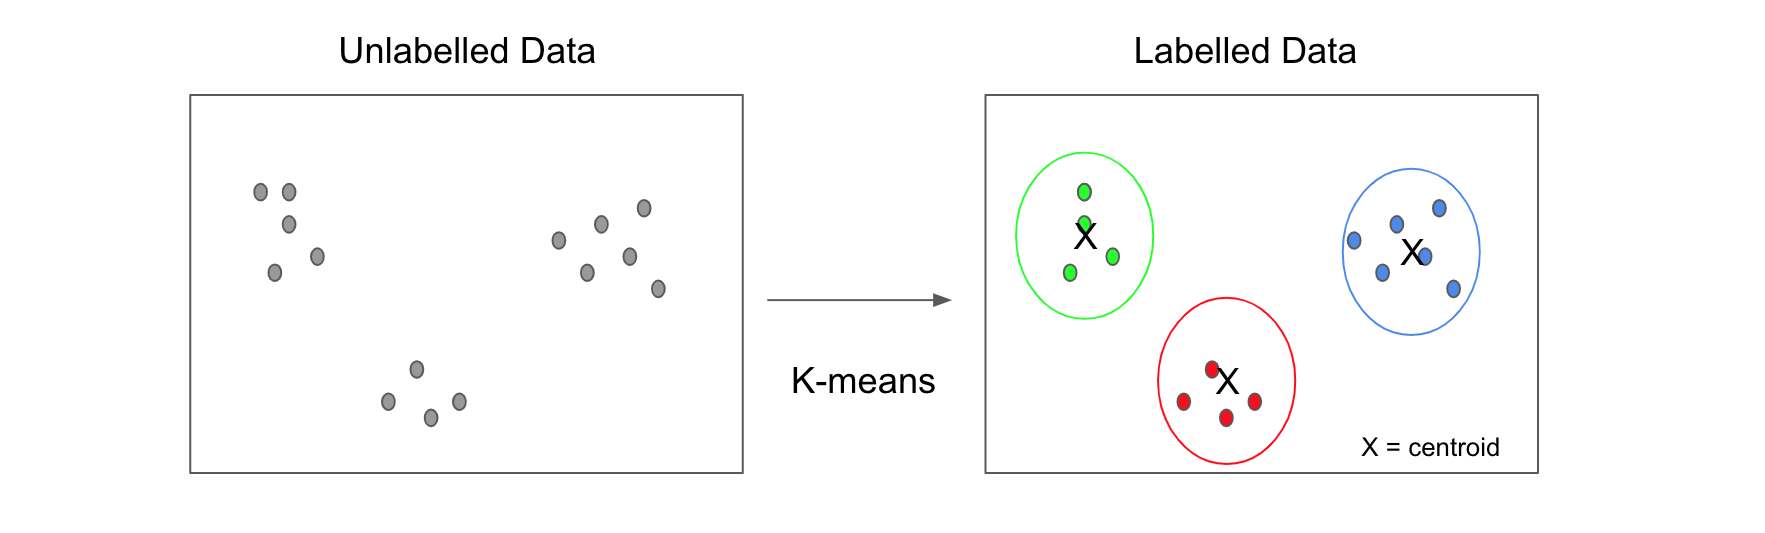

 Dans notre travail, nous avons implémenté l'algorithme k-means et appliqué sur 3 exemples de données iris.

  - nous avons créé des fonctions réutilisables pour les étapes clés de l'algorithme, telles que l'initialisation des prototypes, l'application de la règle de plus proche prototype (ppp) et l’actualisation des prototypes. Ces fonctions ont été regroupées dans une fonction globale pour faciliter l'exécution de l'algorithme.




 
***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# ***Fonction réutilisable***

In [ ]:

def lecture (file) :

  '''
  Cette fonction permet la lecture d'un fichier Siam2 et elle me retourne:
        - le nombre d'objets 'n',
        - les paramètres 'p',
        - le nombre de classes 'c'
        - et la matrice de données 'x'." 
  file : Le nom du fichier Siam2
  '''

  fichier = open(file,"r")            #ouvrir un fichier en lecture (file est le nom du fichier, "r" signifie le mode "lecture" )
  y = fichier.read()                  #lire tout le contenu du fichier en une chaîne de caractères
  liste = y.split()                   #diviser la chaîne de caractères en une liste 
  x= np.array(liste)                  #convertit la liste en un tableau NumPy en utilisant "np.array()"
  x = x.astype(np.float64)            #convertit tous les éléments de la liste en nombres flottants

  n= int(x[0])                        # le nombre de lignes
  p= int(x[1])                        # le nombre de colones 
  c= int(x[2])                        # le nombre de classes
  x=x[3:]                             # la matrice de données 'x'
  x=np.array(x).reshape(n,p+1)        #reformuler le tableau en une matrice de taille (n * p+1)

  fichier.close()
  return x, n, p ,c 


In [ ]:
def initMeans(x, n, p, c) :

  """
    Cette fonction permet d'initialiser aléatoirement les classes de chaque vecteur objet x[i].
    Elle prend en entrée :
        - x : la matrice de données
        - n : le nombre de vecteurs objets
        - p : le nombre de colones (paramètres)
        - c : le nombre de classes
    Elle retourne :
        - x : la matrice de données avec une colonne supplémentaire pour les classes initialisées
        - v : vecteur de prototypes
  """
  
  v=np.zeros((c,p))                           #initialiser vecteur prototype par des zéros
  xp = np.random.randint(0, c, (n,1))         # crée un tableau xp d'entiers aléatoires entre 0 et c, de dimensions (nx1)
  x = np.hstack((x, xp))                      # ajout de la colonne des classes à la matrice de données
  
  
  for i in range(0,c):
      for j in range(0,p) :
          num = 0
          den = 0
          for k in range(0,n) :
              if (x[k][p+1] == i ) :
                num += x[k][j]
                den += 1
          v[i][j] = num/den
  return x,v


In [ ]:

def dist(a,b) :
  '''
  - la fonction dist permet calculer la distance euclidienne au carre 
  '''

  ecart = a-b
  dist = np.sum(ecart**2)                 

  return dist
  

In [ ]:
#Regle du plus proche prototype (ppp)

def ppp(x,v,n,p,c) :
  '''
  ppp : le role de cette fonction est de classer chaque vecteur objet dans le prototype le plus proche 
        en utilisant la règle du prototype le plus proche(ppp).
  '''

  g =np.array((1,c))

  for i in range(0,n) :
      for j in range(0,c) :
           g[j] = dist(x[i][:p],v[j])    #calculer la distance entre vecteur objet x[i] et les prototypes

      ppp = np.argmin(g)                #je utilise la fct argmin(fonction intégrée de NumPy) pour trouver l'indice de la distance minimale qui est représente
                                        #le classe de l'objet x[i] et l'attribue à la variable "ppp"
      x[i][p+1] = ppp

  return x


In [ ]:
#Actualisation des prototypes

def newMeans(x,n,p,c) :
    ''' 
    La fonction 'newMeans' calcule les nouveaux prototypes pour chaque classe dans un ensemble de données,
    en retournant une matrice de prototypes.
    'v[j]' représente la moyenne des éléments de la classe j.
    '''
    
    v=np.zeros((c,p))
    for i in range(0,c):
      for j in range(0,p) :
          num = 0
          den = 0
          for k in range(0,n) :
              if (x[k][p+1] == i ) :
                num += x[k][j]
                den += 1
          v[i][j]= num/den
    return v


In [ ]:
#Variation des centres entre 2 itérations

def diff(v, oldv) :
  '''
  Je vais utiliser cette fct pour déterminer si la boucle d'apprentissage doit continuer :
     - Si delta est inférieur à eps, on considère que les prototypes ne bougent plus beaucoup et donc l'algorithme peut s'arrêter;
     - Sinon, on continue à itérer pour trouver les nouveaux prototypes.

  '''
  d = abs(v - oldv)            #calcule la différence absolue entre les nouveaux centroïdes (v) et les anciens centroïdes (oldv).
  delta = np.amax(d)           #J'utilise la fonction 'np.amax()' pour trouver la valeur maximal

  return delta

***Algoritme kMeans***

In [ ]:
#Algoritme kMeans 

def kMeans(x,n,p,c) :
  '''
  - cette fonction implémente l'algorithme k-means. La fonction prend en entrée quatre paramètres :

      x : la matrice de données 
      n : Le nombre d'élement
      p : Le nombre de paramétres
      c : Le nombre de classes
  '''

  tmax = int(input("Entrez le nombre maximal d'itérations : "))                    #Le nombre maximal d'itérations pour l'algorithme
  eps = float(input("Entrez la précision pour l'arrêt (exemple : 0.001) : "))      
  
  #Initialisation :
  x,v =initMeans(x,n,p,c)                           #initialiation les centres prototype et l'ajoute de l'élement x[i][p+2] a chaque vecteur objet x[i]
  print('\n centre initiaux : \n', v )

  #Boucle d'apprentissage :
  t=0
  while True :
    t += 1
    x = ppp(x, v,n, p, c)                            #la règle du plus proche prototype
    
    oldv = v

    v = newMeans(x,n,p,c)                            #Actualisation les centres prototype
    
    if ( diff(v,oldv) < eps or t>=tmax) : 
        break

  return x,v,t

In [ ]:
#Evalution et partitionnement final

def eval(x,n,p,c) :
  '''
  - Cette fonction permet de évaluer et afficher les résultats de regroupement finaux obtenus par l'algorithme k-means.
  '''
  #partitionnement final :
  print('\n Partitionnement final :')
  for i in range(c) :
    print('class ',i,'\t' ,end = '[')
    for k in range(n) :
      if (x[k][p+1] == i) :
        print(k , end =',')
    print('] \n')


  #calcule la performance de l'algorithme
  total=0
  for j in range(n) :
     if (x[i][p] == x[i][p+1]) :
        total += 1
  score = 100*total /n
  print('score : ',score,'%')


In [ ]:

def matr_conf(x,n,p,c) :
  ''' Cette fonction permet de créer une matrice de confusion '''

  classes = np.unique(x[:,p])
  conf = np.zeros((c, c))

  for i in range(c):
    for j in range(c):
      conf[i, j] = np.sum((x[:,p] == classes[i]) & (x[:,p+1] == classes[j]))
  
  print('matrice de confusion : ')
  print(conf)

# ***Application aux 3 exemples de données iris***

In [ ]:
!ls -l ir*

-rw-r--r-- 1 root root 3611 Feb  5 21:24 iris12.siam2
-rw-r--r-- 1 root root 2411 Feb  5 21:24 iris13.siam2
-rw-r--r-- 1 root root 3511 Feb  5 21:24 iris23.siam2


Entrez le nombre maximal d'itérations : 100
Entrez la précision pour l'arrêt (exemple : 0.001) : 0.001

 centre initiaux : 
 [[5.37272727 3.08863636 2.73863636 0.76363636]
 [5.54821429 3.10714286 2.95714286 0.80357143]]

 itération final :   4

 centres finaux : 
 [[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]]

 Partitionnement final :
class  0 	[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,] 

class  1 	[50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,] 

score :  100.0 %


matrice de confusion : 
[[50.  0.]
 [ 0. 50.]]




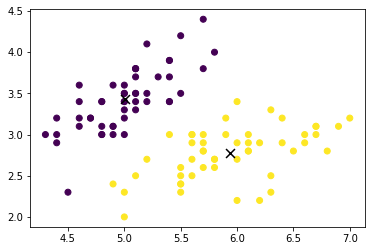

In [ ]:
#application de kMeans sur iris12.siam2

(x,n,p,c) = lecture('iris12.siam2')

(x,v,t) =kMeans(x,n,p,c)

print('\n itération final :  ', t)
print('\n centres finaux : \n', v)

eval(x,n,p,c)
print('\n')
matr_conf(x,n,p,c)

print('\n')
# affichage des résultats
plt.scatter(x[:, 0], x[:, 1], c=x[:,p+1])                                 # Tracer les données en utilisant les deux paramétres 1 et 2 
plt.scatter(v[:, 0], v[:, 1], c='black', marker='x', s=80)                # Tracer les centroïdes 
plt.show() 

Entrez le nombre maximal d'itérations : 100
Entrez la précision pour l'arrêt (exemple : 0.001) : 0.001

 centre initiaux : 
 [[6.21395349 2.91395349 4.82325581 1.69534884]
 [6.29824561 2.84035088 4.96842105 1.66140351]]

 itération final :   6

  centres finaux : 
 [[5.9203125  2.7515625  4.4203125  1.434375  ]
 [6.86944444 3.08611111 5.76944444 2.10555556]]

 Partitionnement final :
class  0 	[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,51,56,63,64,69,71,73,76,77,83,84,88,92,96,99,] 

class  1 	[27,50,52,53,54,55,57,58,59,60,61,62,65,66,67,68,70,72,74,75,78,79,80,81,82,85,86,87,89,90,91,93,94,95,97,98,] 

score :  100.0 %


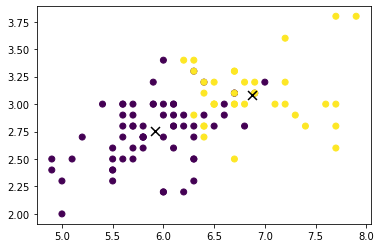

In [ ]:
#application de kMeans sur iris23.siam2

(x,n,p,c) = lecture('iris23.siam2')

(x,v,t) =kMeans(x,n,p,c)

print('\n itération final :  ', t)
print('\n  centres finaux : \n', v)

eval(x,n,p,c)


# affichage des résultats
plt.scatter(x[:, 0], x[:, 1], c=x[:,p+1])                               # Tracer les données en utilisant les deux paramétres 1 et 2
plt.scatter(v[:, 0], v[:, 1], c='black', marker='x', s=80)              # Tracer les centroïdes en utilisant une couleur différente
plt.show() 

Entrez le nombre maximal d'itérations : 100
Entrez la précision pour l'arrêt (exemple : 0.001) : 0.001

 centre initiaux : 
 [[5.81777778 3.19111111 3.55777778 1.14888889]
 [5.78       3.20909091 3.46545455 1.12545455]]

 itération final :  3

  centres finaux : 
 [[6.588 2.974 5.552 2.026]
 [5.006 3.428 1.462 0.246]]

 Partitionnement final :
class  0 	[50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,] 

class  1 	[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,] 

score :  0.0 %


matrice de confusion : 
[[ 0. 50.]
 [50.  0.]]




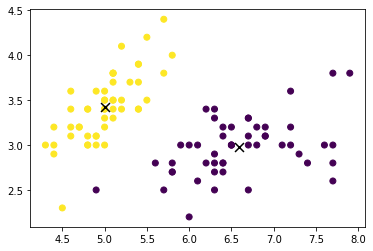

In [ ]:
#application de kMeans sur iris13.siam2

(x,n,p,c) = lecture('iris13.siam2')

(x,v,t) =kMeans(x,n,p,c)

print('\n itération final : ', t)
print('\n  centres finaux : \n', v)

eval(x,n,p,c)
print('\n')

matr_conf(x,n,p,c)
print('\n')

# affichage des résultats
plt.scatter(x[:, 0], x[:, 1], c=x[:,p+1])                               # Tracer les données en utilisant les deux paramétres 1 et 2
plt.scatter(v[:, 0], v[:, 1], c='black', marker='x', s=80)              # Tracer les centroïdes en utilisant une couleur différente
plt.show() 

# **NB**


  On remarque des variations importantes dans les résultats obtenus lors de chaque exécution de l'algorithme k-means, parfois avec un score de 100% et d'autres fois avec un score de 0%.

  Cela peut être observé dans la matrice de confusion, où il peut y avoir des permutations des groupes. Il arrive parfois que tous les éléments de la classe 1 soient considérés comme appartenant à la classe 2 et egalement tous les éléments de la classe 2 soient considérés comme appartenant à la classe 1.

Il est important de noter que l'algorithme k-means est très sensible à l'initialisation des prototypes


  - le choix d'une bonne initialisation de l’algorithme K-means doit permettre d’obtenir une solution de meilleure qualité.

  - il existe plusieurs techniques d'initialisation des prototypes telles que :
    - la technique Forgy,
    - la technique de Hartigan-Wong
    - et la technique k-means++.